# DIC Project Phase 2

### Grace Evangelene Avula Lael - 50595809

## Task 1

#### Hypothesis :
1. Availability of Medical resources, literacy rates, prevalance of diseases and mortality rates of a ceratin area directly affects the life expectancy either positively or negatively.
2. Maternal mortality rate can be estimated by the levels of Birth rates, Literacy rate, medical resources and health coditions.

#### Step 1 : Reading and processing the data 

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('phase2.csv')


life_expectancy_features = [
    'Birth rate, crude (per 1,000 people)', 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
    'Hospital beds (per 1,000 people)', 'Immunization, BCG (% of one-year-old children)', 
    'Literacy rate, adult total (% of people ages 15 and above)', 'Mortality rate, infant (per 1,000 live births)', 
    'Nurses and midwives (per 1,000 people)', 'Physicians (per 1,000 people)'
]
maternal_mortality_features = [
    'Birth rate, crude (per 1,000 people)', 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
    'Hospital beds (per 1,000 people)', 'Lifetime risk of maternal death (%)', 
    'Literacy rate, adult total (% of people ages 15 and above)', 'Mortality rate, neonatal (per 1,000 live births)', 
    'Nurses and midwives (per 1,000 people)', 'Prevalence of anemia among pregnant women (%)'
]


X_life_expectancy = data[life_expectancy_features]
y_life_expectancy = data['Life expectancy at birth, total (years)']

X_maternal_mortality = data[maternal_mortality_features]
y_maternal_mortality = data['Maternal mortality ratio (modeled estimate, per 100,000 live births)']


X_train_life, X_test_life, y_train_life, y_test_life = train_test_split(X_life_expectancy, y_life_expectancy, test_size=0.2, random_state=42)
X_train_maternal, X_test_maternal, y_train_maternal, y_test_maternal = train_test_split(X_maternal_mortality, y_maternal_mortality, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_life = scaler.fit_transform(X_train_life)
X_test_life = scaler.transform(X_test_life)
X_train_maternal = scaler.fit_transform(X_train_maternal)
X_test_maternal = scaler.transform(X_test_maternal)


#### Step 2 : Checking Hypothesis-1(Life Expectancy) using K-nearest neighbours (KNN) and Convolutional Neural Networks (CNN)

#### Using CNN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

model_life = Sequential()
model_life.add(Conv1D(64, 2, activation='relu', input_shape=(X_train_life.shape[1], 1)))
model_life.add(MaxPooling1D(2))
model_life.add(Conv1D(128, 2, activation='relu'))
model_life.add(MaxPooling1D(2))
model_life.add(Flatten())
model_life.add(Dense(64, activation='relu'))
model_life.add(Dense(1))

model_life.compile(optimizer=Adam(), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_life = model_life.fit(X_train_life, y_train_life, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

y_test_life = np.array(y_test_life).reshape(-1, 1)

mse_life = model_life.evaluate(X_test_life, y_test_life)
print(f"Mean Squared Error for Life Expectancy Prediction with CNN: {mse_life}")

y_pred_life = model_life.predict(X_test_life)

features = [
    'Birth rate, crude (per 1,000 people)', 
    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
    'Hospital beds (per 1,000 people)', 
    'Immunization, BCG (% of one-year-old children)', 
    'Literacy rate, adult total (% of people ages 15 and above)', 
    'Mortality rate, infant (per 1,000 live births)', 
    'Nurses and midwives (per 1,000 people)', 
    'Physicians (per 1,000 people)'
]

positive_features = [
    'Hospital beds (per 1,000 people)', 
    'Immunization, BCG (% of one-year-old children)', 
    'Literacy rate, adult total (% of people ages 15 and above)', 
    'Nurses and midwives (per 1,000 people)', 
    'Physicians (per 1,000 people)'
]
negative_features = [
    'Birth rate, crude (per 1,000 people)', 
    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
    'Mortality rate, infant (per 1,000 live births)'
]

max_values = X_train_life.max(axis=0)

results = []

for i in range(10):  
    feature_values = X_test_life[i]  
    row = {
        'Expected Output': y_test_life[i][0],  
        'Predicted Output': y_pred_life[i][0],  
        'Life Expectancy': 'High' if y_pred_life[i][0] > 65 else 'Low'
    }
    
    positive_high_count = 0
    for feature in positive_features:
        feature_index = features.index(feature)
        if (feature_values[feature_index] / max_values[feature_index]) > 0.3:
            positive_high_count += 1
            
    negative_high_count = 0
    for feature in negative_features:
        feature_index = features.index(feature)
        if (feature_values[feature_index] / max_values[feature_index]) > 0.4:
            negative_high_count += 1

    row['Positive Features (High/Low)'] = 'High' if (positive_high_count / len(positive_features)) > 0.3 else 'Low'
    row['Negative Features (High/Low)'] = 'High' if (negative_high_count / len(negative_features)) > 0.3 else 'Low'
    
    results.append(row)

results_df = pd.DataFrame(results)
print("\nSample Predictions with Expected and Predicted Outputs:")
print(results_df)


Epoch 1/50


C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4220.7827 - val_loss: 658.7108
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 573.5400 - val_loss: 363.8311
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 325.7592 - val_loss: 219.1482
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 195.1240 - val_loss: 132.1065
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.0793 - val_loss: 76.9949
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.5400 - val_loss: 46.2897
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.9439 - val_loss: 29.2570
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.8380 - val_loss: 24.7689
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.0344 - val_loss: 21.3911
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.1960 - val_loss: 19.9853
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.0962 - val_loss: 18.0755
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

##### From the above results we can see that for most of the entries as the positive features increase the life expectancy goes up and as the negative features increase the life expectancy reduces.

##### Source : https://www.tensorflow.org/tutorials/images/cnn

#### Using Knn

Mean Squared Error for Life Expectancy Prediction with KNN: 2.8784142346368706
  Expected Output  Predicted Output Life Expectancy  \
0         [73.57]            73.030            High   
1         [69.68]            69.600            High   
2         [56.34]            55.304             Low   
3         [65.73]            66.124            High   
4         [72.64]            73.166            High   
5         [76.44]            76.824            High   
6         [70.94]            70.928            High   
7         [52.97]            54.542             Low   
8         [76.13]            75.640            High   
9         [67.21]            67.466            High   

  Positive Features (High/Low) Negative Features (High/Low)  
0                         High                          Low  
1                         High                          Low  
2                          Low                         High  
3                          Low                         High  
4    

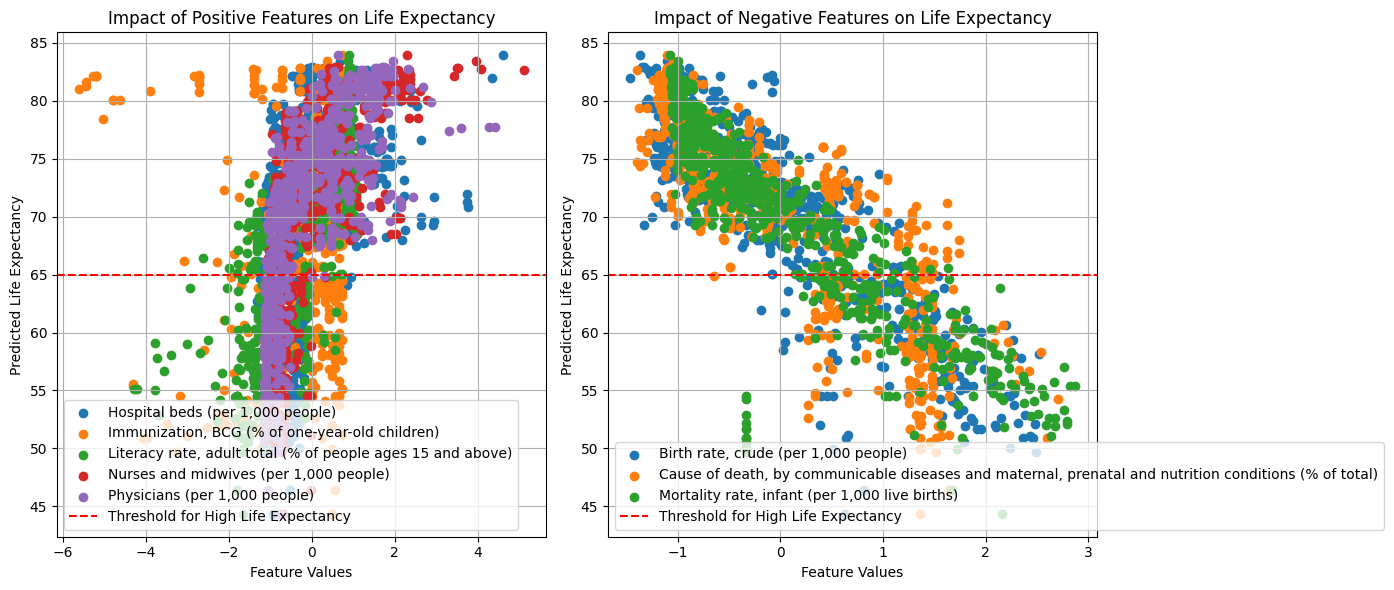

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


knn = KNeighborsRegressor(n_neighbors=5)


knn.fit(X_train_life, y_train_life)


y_pred_life = knn.predict(X_test_life)


y_test_life = np.array(y_test_life)
y_pred_life = np.array(y_pred_life)


mse_life = mean_squared_error(y_test_life, y_pred_life)
print(f"Mean Squared Error for Life Expectancy Prediction with KNN: {mse_life}")


features = [
    'Birth rate, crude (per 1,000 people)', 
    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
    'Hospital beds (per 1,000 people)', 
    'Immunization, BCG (% of one-year-old children)', 
    'Literacy rate, adult total (% of people ages 15 and above)', 
    'Mortality rate, infant (per 1,000 live births)', 
    'Nurses and midwives (per 1,000 people)', 
    'Physicians (per 1,000 people)'
]


positive_features = [
    'Hospital beds (per 1,000 people)', 
    'Immunization, BCG (% of one-year-old children)', 
    'Literacy rate, adult total (% of people ages 15 and above)', 
    'Nurses and midwives (per 1,000 people)', 
    'Physicians (per 1,000 people)'
]
negative_features = [
    'Birth rate, crude (per 1,000 people)', 
    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
    'Mortality rate, infant (per 1,000 live births)'
]


max_values = X_train_life.max(axis=0)


results = []


for i in range(10): 
    feature_values = X_test_life[i] 
    row = {
        'Expected Output': y_test_life[i],
        'Predicted Output': y_pred_life[i],
        'Life Expectancy': 'High' if y_pred_life[i] > 65 else 'Low'
    }
    
   
    positive_high_count = 0
    for feature in positive_features:
        feature_index = features.index(feature)
        if (feature_values[feature_index] / max_values[feature_index]) > 0.3:
            positive_high_count += 1
            
    negative_high_count = 0
    for feature in negative_features:
        feature_index = features.index(feature)
        if (feature_values[feature_index] / max_values[feature_index]) > 0.4:
            negative_high_count += 1


    row['Positive Features (High/Low)'] = 'High' if (positive_high_count / len(positive_features)) > 0.3 else 'Low'
    row['Negative Features (High/Low)'] = 'High' if (negative_high_count / len(negative_features)) > 0.3 else 'Low'
    
    results.append(row)


results_df = pd.DataFrame(results)

print(results_df)

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
for feature in positive_features:
    plt.scatter(X_test_life[:, features.index(feature)], y_pred_life, label=feature)

plt.title('Impact of Positive Features on Life Expectancy')
plt.xlabel('Feature Values')
plt.ylabel('Predicted Life Expectancy')
plt.axhline(y=65, color='r', linestyle='--', label='Threshold for High Life Expectancy')
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)
for feature in negative_features:
    plt.scatter(X_test_life[:, features.index(feature)], y_pred_life, label=feature)

plt.title('Impact of Negative Features on Life Expectancy')
plt.xlabel('Feature Values')
plt.ylabel('Predicted Life Expectancy')
plt.axhline(y=65, color='r', linestyle='--', label='Threshold for High Life Expectancy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


##### From the above output predictions and the visualisations we can see similar results as knn, that as positive features increase, life expectancy increases and the opposite takes place for the negative features.

#### Step-3 : Checking Hypothesis-2(Maternal Mortality) using Knn and Cnn

#### Using Cnn:

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import pandas as pd


mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_maternal.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  
])


mlp.compile(optimizer='adam', loss='mse')


history = mlp.fit(X_train_maternal, y_train_maternal, epochs=50, validation_split=0.2, batch_size=8, verbose=1)


y_pred_maternal = mlp.predict(X_test_maternal).flatten()


mse_maternal = mean_squared_error(y_test_maternal, y_pred_maternal)
print(f"Mean Squared Error for Maternal Mortality Ratio Prediction with MLP: {mse_maternal}")


max_values_maternal = X_train_maternal.max(axis=0)


results = []


for i in range(10):  
    feature_values = X_test_maternal[i]  
    row = {
        'Expected Output': y_test_maternal.iloc[i],  
        'Predicted Output': y_pred_maternal[i],
        'Maternal Mortality Ratio': 'High' if y_pred_maternal[i] > 150 else 'Low' 
    }
    
    high_count = 0 
    
    
    for j, feature in enumerate(maternal_mortality_features):
        feature_value = feature_values[j]
        max_value = max_values_maternal[j]
        feature_status = 'High' if (feature_value / max_value) > 0.2 else 'Low' 
        
        if feature_status == 'High':
            high_count += 1 

  
    row['Features'] = 'High' if high_count > len(maternal_mortality_features) / 3 else 'Low'

    results.append(row)


results_df = pd.DataFrame(results)
print("\nSample Predictions with Expected and Predicted Outputs:")
print(results_df)


Epoch 1/50


C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 27087.4629 - val_loss: 12820.3682
Epoch 2/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12850.1494 - val_loss: 10588.5625
Epoch 3/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10616.7109 - val_loss: 9848.6777
Epoch 4/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8977.5146 - val_loss: 9480.1270
Epoch 5/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9252.2373 - val_loss: 9020.1641
Epoch 6/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8917.6299 - val_loss: 8719.3936
Epoch 7/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9462.4893 - val_loss: 8363.4912
Epoch 8/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7708.1880 - val_loss: 8052.8857
Epoch 9/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8506.9883 - val_loss: 7700.7373
Epoch 10/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7397.6050 - val_loss: 7392.0840
Epoch 11/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7682.1963 - val_loss: 69

##### From the results we can observe that the maternal mortality is directly proprtional to the features considered.

##### Source : https://www.tensorflow.org/guide/core/mlp_core

#### Using Knn

Mean Squared Error for Maternal Mortality Ratio Prediction with KNN: 2871.471787709497

Sample Predictions with Expected and Predicted Outputs:
   Expected Output  Predicted Output Maternal Mortality Ratio Features
0            103.0             116.6                      Low      Low
1             14.0              14.2                      Low     High
2             64.0              64.0                      Low     High
3            327.0             345.2                     High     High
4             13.0              19.8                      Low      Low
5              6.0               6.6                      Low      Low
6            139.0             138.6                      Low      Low
7            435.0             386.2                     High     High
8             70.0              69.8                      Low      Low
9             39.0              35.8                      Low      Low


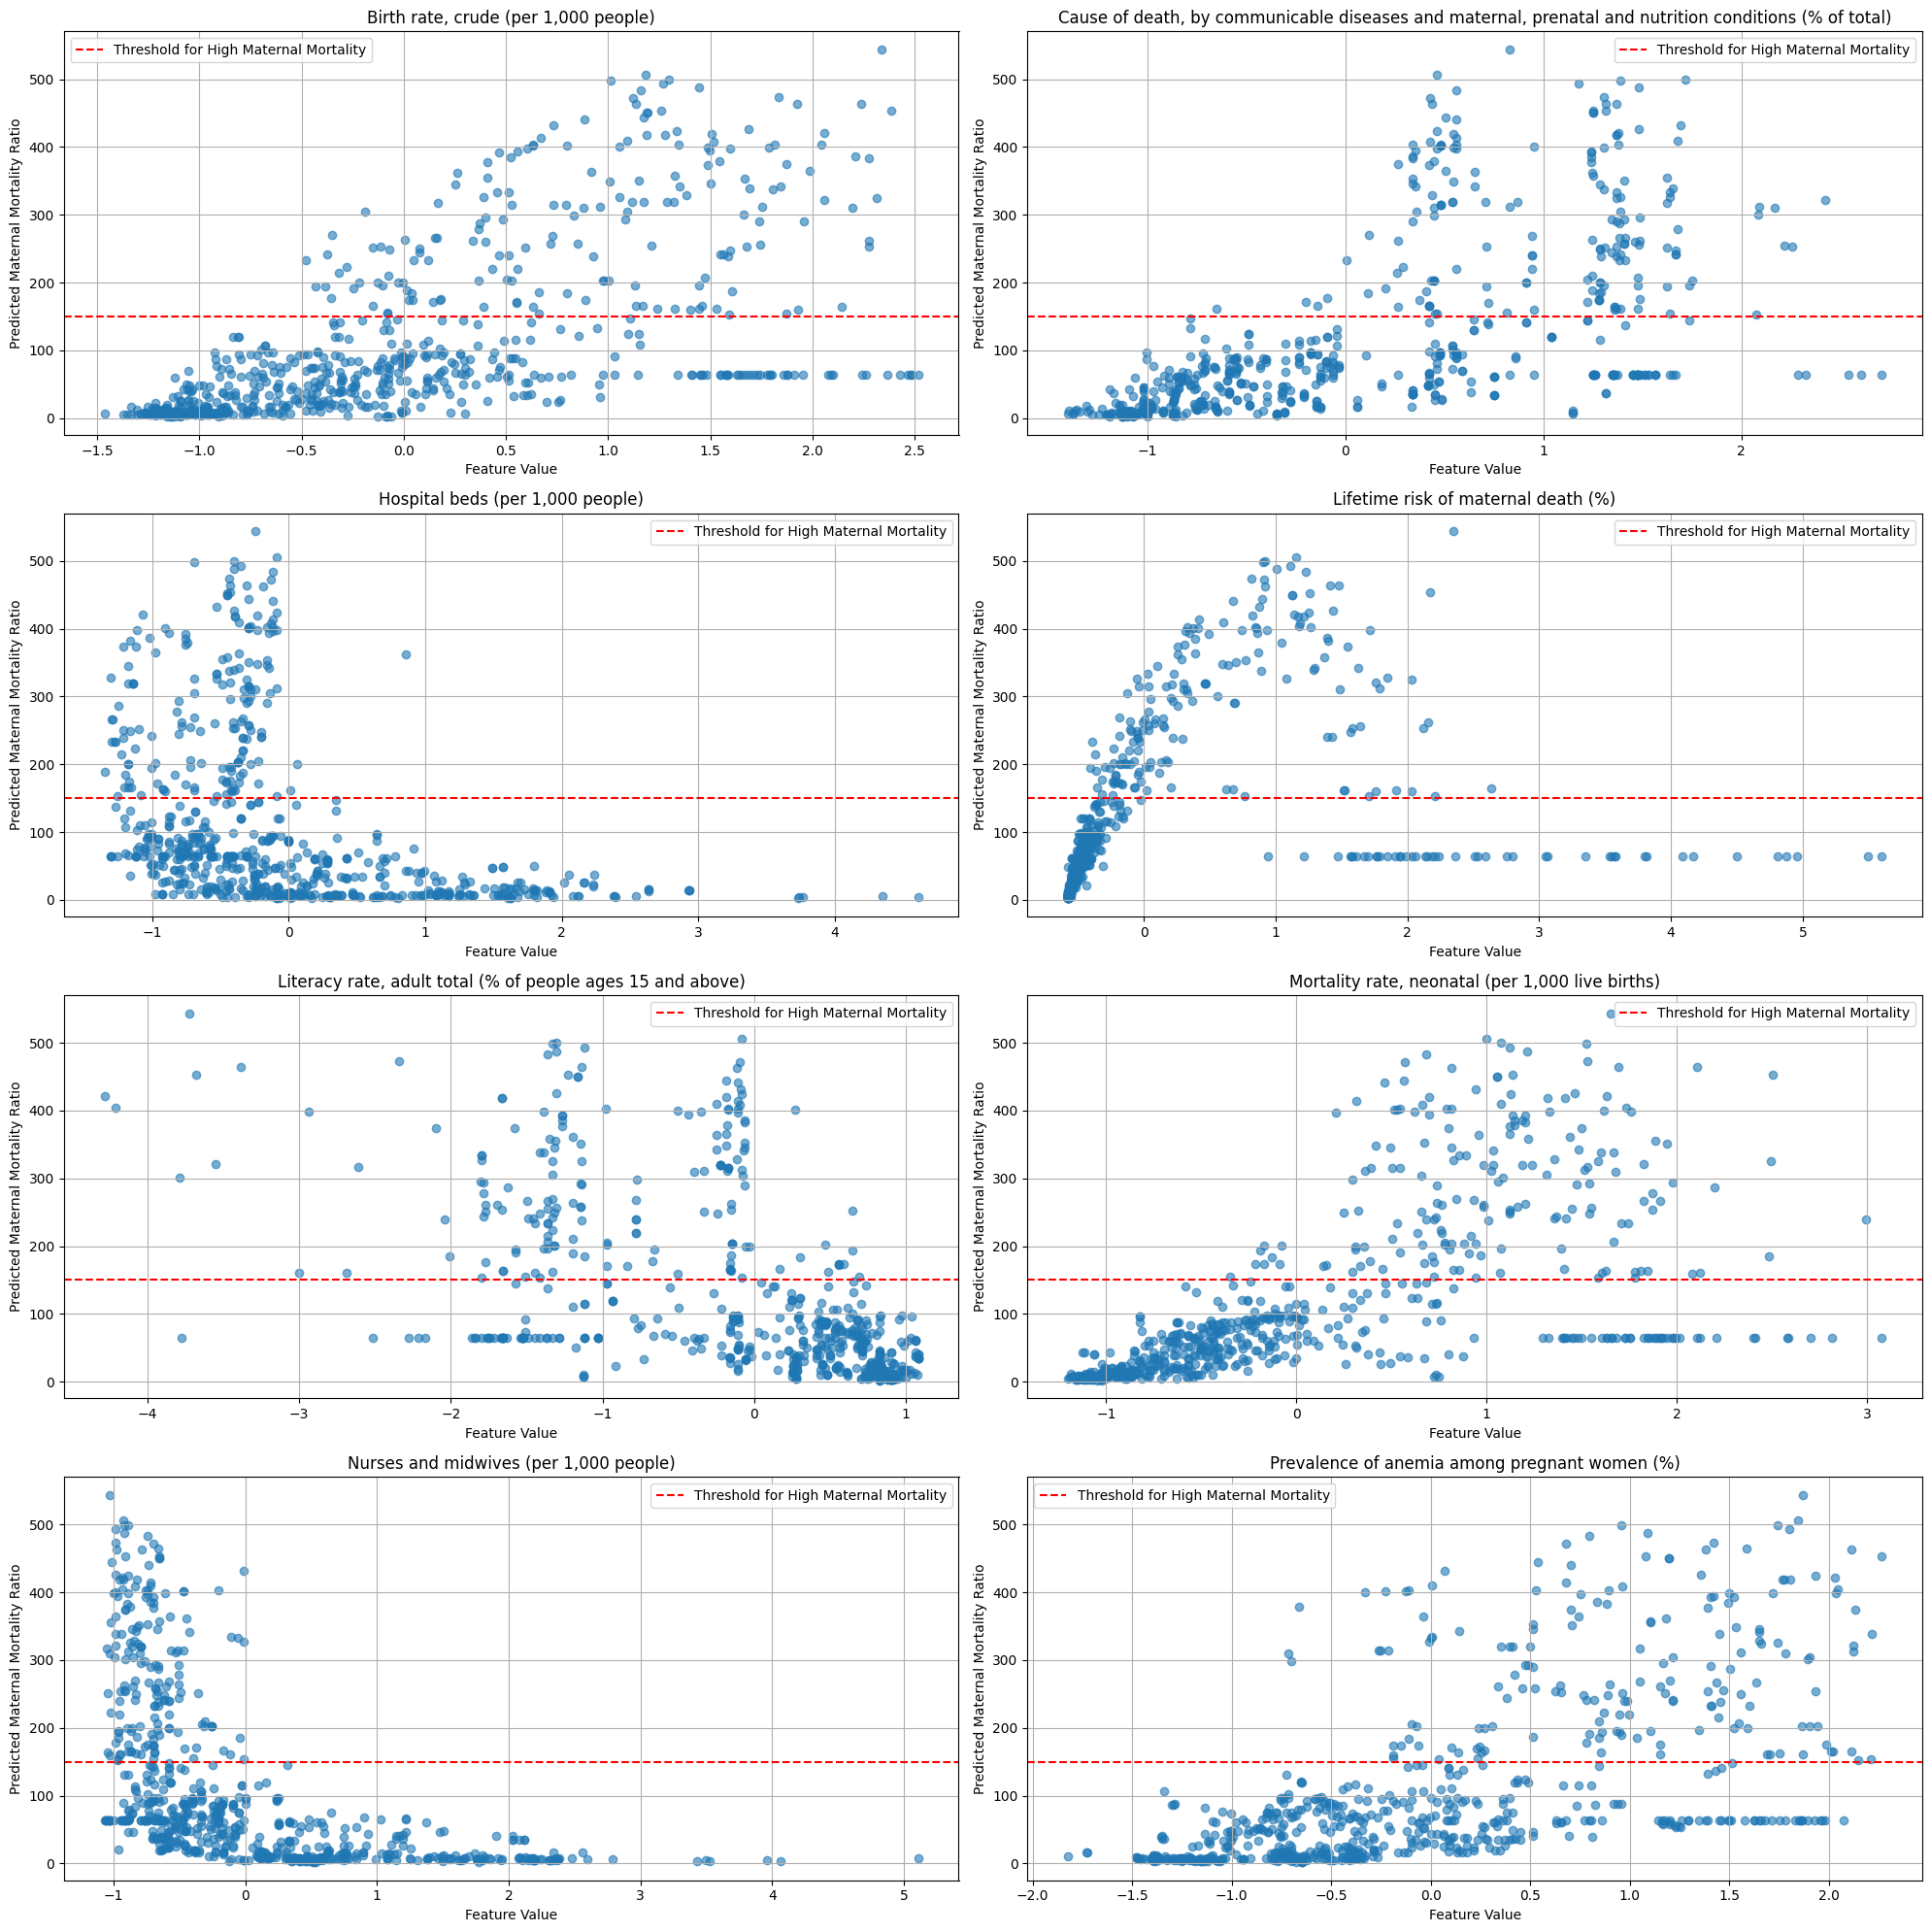

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


knn = KNeighborsRegressor(n_neighbors=5)


knn.fit(X_train_maternal, y_train_maternal)


y_pred_maternal = knn.predict(X_test_maternal)


mse_maternal = mean_squared_error(y_test_maternal, y_pred_maternal)
print(f"Mean Squared Error for Maternal Mortality Ratio Prediction with KNN: {mse_maternal}")


max_values_maternal = X_train_maternal.max(axis=0)


results = []


for i in range(10):  
    feature_values = X_test_maternal[i] 
    row = {
        'Expected Output': y_test_maternal.iloc[i], 
        'Predicted Output': y_pred_maternal[i],
        'Maternal Mortality Ratio': 'High' if y_pred_maternal[i] > 150 else 'Low'  
    }
    
    high_count = 0  
    
   
    for j, feature in enumerate(maternal_mortality_features):
        feature_value = feature_values[j]
        max_value = max_values_maternal[j]
        feature_status = 'High' if (feature_value / max_value) > 0.2 else 'Low'  
        
        if feature_status == 'High':
            high_count += 1  

    
    row['Features'] = 'High' if high_count > len(maternal_mortality_features) / 3 else 'Low'

    results.append(row)


results_df = pd.DataFrame(results)
print("\nSample Predictions with Expected and Predicted Outputs:")
print(results_df)


plt.figure(figsize=(20, 20))


for i, feature in enumerate(maternal_mortality_features):
    plt.subplot(4, 2, i + 1)  # Create a 2x4 grid for subplots
    plt.scatter(X_test_maternal[:, i], y_pred_maternal, alpha=0.6)
    plt.title(feature)
    plt.xlabel('Feature Value')
    plt.ylabel('Predicted Maternal Mortality Ratio')
    plt.axhline(y=150, color='r', linestyle='--', label='Threshold for High Maternal Mortality')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()


##### From the predicted output and the visualisations we can observe that the maternal mortality is proprtional/ directly related to the features and increases with increase in anemia cases,mortality rate, birth rate, and diseases where as decreases with increase of medical resources it reduces.

## Task 2

### For Hypothesis 1 :

#### Justification for Choosing the algorithm

##### CNN :
Though CNNs are primarily used in image analysis, they can also excel in tasks requiring pattern recognition by using convolutional layers to identify complex relationships. Here, CNNs could potentially uncover non-linear connections among features (like literacy rates, medical infrastructure, and disease rates) impacting life expectancy.

I structured the CNN with two 1D convolutional layers, each followed by max-pooling layers to capture relevant patterns across features. These layers were then flattened and connected to dense layers for final prediction.

##### KNN: 
KNN’s simplicity allows it to predict outcomes based on similarities between data points, making it effective when data relationships are more straightforward. Using KNN provided a comparison to see if a simpler, instance-based model could perform as well as CNN without heavy tuning.

With KNN, each test point’s life expectancy was based on the average outcomes of its five closest training neighbors. This simplicity helped it capture local patterns in the data without complex transformations.

#### Tuning / Training the algorithm :

##### CNN :
I optimized the CNN using the Adam optimizer and MSE loss function, with early stopping to prevent overfitting. Hyperparameters like batch size and epochs were tuned to balance accuracy and computational load.

##### KNN:
 Minimal tuning was required compared to the CNN. Increasing or decreasing the number of neighbors had little impact on accuracy, so I kept the default parameter.

#### Model Effectiveness and Intelligence gained : 

#####  Mean Squared Error (MSE):
The CNN achieved an MSE of 10.82, which was acceptable but could be further optimized. However, the KNN achieved a significantly lower MSE of 2.88, suggesting that it was more effective for this particular problem. The difference in MSE highlights that the KNN was better able to capture patterns in this structured dataset without overfitting or requiring complex feature interactions.

##### Feature Insights and Interpretability:

Positive Features (High): Features like “Hospital beds per 1,000 people,” “Literacy rate,” and “Physicians per 1,000 people” were positively associated with higher life expectancy, aligning with the hypothesis that access to resources and literacy rates support longevity.

Negative Features (High): High values in features such as “Infant mortality rate” and “Communicable disease death rate” correlated with lower life expectancy, which confirmed the hypothesis that high prevalence of diseases and high mortality rates negatively impact life expectancy.

For both models, predictions classified life expectancy as “High” or “Low” based on whether the predicted life expectancy exceeded 65 years. This threshold made it easier to observe how different features contributed to life expectancy across various regions or groups.

##### Intelligence Gained:

Resource Allocation: The influence of positive features (e.g., hospital beds, physicians) underscores the importance of resource allocation in health outcomes, suggesting that policies focused on increasing healthcare resources could significantly improve life expectancy.

Education and Health Awareness: High literacy rates emerged as a positive feature, indicating that educating the public about health can reduce mortality rates and promote preventive care, thereby extending life expectancy.

Disease Prevention: Features related to disease prevalence were consistently associated with lower life expectancy, underscoring the need for health interventions and preventive programs to combat diseases, especially in regions with high mortality rates.

#### Conclusion / Summary :
Overall, KNN emerged as the more effective model, achieving a lower MSE and proving to be more accurate for life expectancy prediction on this dataset. While CNN offered the ability to capture more complex relationships, KNN’s simplicity made it a better fit for this structured data. The insights gained validate the hypothesis and suggest potential actions, like enhancing healthcare infrastructure and focusing on public health education, to improve life expectancy outcomes.

### For Hypothesis 2:

#### Justification for Choosing the algorithm

##### CNN:
Maternal mortality is influenced by a mix of non-linear factors—like literacy rate, healthcare access, and nutrition levels. An MLP is well-suited for capturing these intricate relationships because its layered structure allows it to learn and represent complex patterns in the data.

he MLP model can handle additional features or larger datasets in the future, making it adaptable as more data becomes available.

Although neural networks can be less interpretable, the accuracy boost was worth it given the healthcare context where prediction precision is critical for real-world application.

##### KNN:
KNN is a simpler, non-parametric model that provides a useful comparison to the MLP model. Since KNN bases predictions on similarities between instances, it often captures straightforward relationships well. This simplicity makes it a good benchmark.

Because KNN predictions depend directly on similar data points, it’s straightforward to understand its predictions by analyzing close neighbors in the dataset.


#### Tuning / Training the algorithm :

##### CNN :
Training: The MLP model was structured with two hidden layers containing 64 and 32 neurons. ReLU activation functions helped the model handle non-linearities. The final output layer consisted of a single neuron to output continuous values representing maternal mortality.

Tuning: I tested different configurations to find the ideal balance. After experimenting with various layer and neuron configurations, I settled on a 64-32-1 setup to keep the model effective without risking overfitting. I trained the model over 50 epochs, using the Adam optimizer and Mean Squared Error (MSE) as the loss metric.

##### KNN :
Training: The KNN model used five neighbors, making predictions based on the average mortality rate of these closest points in the feature space.

Tuning: I tried different values of n_neighbors to see if a larger or smaller neighborhood might improve results, but five neighbors provided a good balance.

#### Model Effectiveness and Intelligence gained : 

#####
CNN:

Mean Squared Error (MSE): The MLP’s MSE was approximately 2400, which indicated how closely the model’s predictions matched actual values. This is a core metric for regression models, especially in this case where precise predictions are necessary.

Observations: The MLP model effectively differentiated cases of high mortality rates, essential for identifying critical cases. The model’s “High” and “Low” classifications for these instances were accurate, confirming that it could successfully capture important patterns related to healthcare and social factors affecting maternal mortality.

KNN:

Mean Squared Error (MSE): The KNN’s MSE was around 2871, which was higher than the MLP’s, indicating it was less precise. While KNN could capture general trends, it was less effective at nuanced predictions for maternal mortality.

Observations: Despite its lower precision, KNN highlighted some linear relationships, suggesting that certain features, like birth rate and anemia prevalence, had more straightforward impacts on maternal mortality. This provided a foundation for exploring both simpler and more complex interactions within the data.

##### Model Performance and Insights
Model Comparison: Overall, the MLP outperformed the KNN in accuracy, reflected in the lower MSE. This confirmed that the MLP could better handle the non-linear relationships in the data.

Threshold Analysis: By setting a threshold of 150 to label mortality as "High" or "Low," both models were able to separate cases with notable accuracy. However, the MLP provided clearer distinctions, especially in extreme cases.

Feature Importance: Examining individual features reinforced our hypothesis that factors like literacy rates and access to healthcare resources heavily influence maternal mortality. This aligns with the understanding that increasing healthcare resources and literacy could reduce these risks.

#### Conclusion:
The MLP neural network was more effective than KNN for predicting maternal mortality rates based on various health and social indicators. Its lower MSE and improved handling of complex cases made it a stronger choice. Using this model also provided insights into the factors that most impact maternal mortality, suggesting areas where healthcare initiatives could have the greatest effect, such as improving education and healthcare access for mothers.